In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.4 MB/s eta 0:00:00


# A* Search in Urban Road Networks using OSMnx and NetworkX

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Ensure plots are shown inline in notebooks
%matplotlib inline

In [ ]:
ox.__version__

'2.0.3'

In [ ]:
nx.__version__

'3.4.2'

In [ ]:
# Define a location (city, region or place name)
place = "Natal, Rio Grande do Norte, Brazil"

# Download the street network for driving
print("Downloading and creating the graph from OSM...")
G = ox.graph_from_place(place, network_type='drive')

In [ ]:
# impute speed on all edges missing data
G = ox.routing.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.routing.add_edge_travel_times(G)

In [7]:
all_nodes = list(G.nodes(data=True))
all_nodes[:3]

[(243207469, {'y': -5.8314996, 'x': -35.1831317, 'street_count': 3}),
 (243207479, {'y': -5.823197, 'x': -35.1833698, 'street_count': 3}),
 (243207483, {'y': -5.8169275, 'x': -35.183197, 'street_count': 3})]

In [8]:
all_edges = list(G.edges(data=True))
all_edges[1]

(243207479,
 7051202993,
 {'osmid': 41129587,
  'highway': 'primary',
  'lanes': '2',
  'maxspeed': '70',
  'name': 'Avenida Senador Dinarte de Medeiros Mariz',
  'oneway': True,
  'ref': 'RN-301',
  'reversed': False,
  'length': np.float64(7.416712084339956),
  'speed_kph': 70.0,
  'travel_time': 0.3814309071946263})

In [39]:
# Define Source and Target

# Select arbitrary coordinates in the region (longitude, latitude)
src_point = (-35.1998821, -5.8428893)
dst_point = (-35.268811, -5.719613)

# Get the nearest nodes on the graph for these coordinates
print("Finding nearest graph nodes for origin and destination...")
src_node = ox.distance.nearest_nodes(G, src_point[0], src_point[1])
dst_node = ox.distance.nearest_nodes(G, dst_point[0], dst_point[1])

Finding nearest graph nodes for origin and destination...


Plotting the street network...


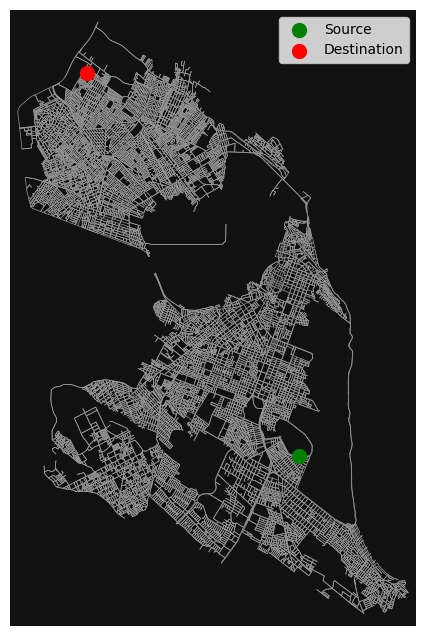

In [74]:
# Extract node coordinates for plotting
src_x = G.nodes[src_node]['x']
src_y = G.nodes[src_node]['y']

dst_x = G.nodes[dst_node]['x']
dst_y = G.nodes[dst_node]['y']

# Plot the street network
print("Plotting the street network...")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Plot the source point
ax.scatter(src_x, src_y, c='green', s=100, label='Source', zorder=5)

# Plot the destination point
ax.scatter(dst_x, dst_y, c='red', s=100, label='Destination', zorder=5)

# Add a legend to distinguish source and destination
ax.legend(loc='upper right')

# Display the plot
plt.show()

## A-star

### Heuristic Euclidean

In [63]:
 %%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by length..."
path_astar_length = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic=lambda u, v: ox.distance.euclidean(
        G.nodes[u]['y'], G.nodes[u]['x'],
        G.nodes[v]['y'], G.nodes[v]['x']
    ),
    weight='length'
)

In [64]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by travel time...
path_astar_time = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic=lambda u, v: ox.distance.euclidean(
        G.nodes[u]['y'], G.nodes[u]['x'],
        G.nodes[v]['y'], G.nodes[v]['x']
    ),
    weight='travel_time'
)

### Heuristic Great Circle

In [66]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by length..."
path_astar_length = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic=lambda u, v: ox.distance.great_circle(
        G.nodes[u]['y'], G.nodes[u]['x'],
        G.nodes[v]['y'], G.nodes[v]['x']
    ),
    weight='length'
)

In [68]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by travel time...
path_astar_time = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic=lambda u, v: ox.distance.great_circle(
        G.nodes[u]['y'], G.nodes[u]['x'],
        G.nodes[v]['y'], G.nodes[v]['x']
    ),
    weight='travel_time'
)

### Heuristic Manhattan

In [70]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by length..."
path_astar_length = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic = lambda u, v: abs(G.nodes[u]['x'] - G.nodes[v]['x']) + abs(G.nodes[u]['y'] - G.nodes[v]['y']),
    weight='length'
)

In [71]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Running A* pathfinding algorithm by travel time...
path_astar_time = nx.astar_path(
    G,
    src_node,
    dst_node,
    heuristic = lambda u, v: abs(G.nodes[u]['x'] - G.nodes[v]['x']) + abs(G.nodes[u]['y'] - G.nodes[v]['y']),
    weight='travel_time'
)

In [72]:
# compare the two routes
route1_length = int(sum(ox.routing.route_to_gdf(G, path_astar_length, weight="length")["length"]))
route2_length = int(sum(ox.routing.route_to_gdf(G, path_astar_time, weight="travel_time")["length"]))
route1_time = int(sum(ox.routing.route_to_gdf(G, path_astar_length, weight="length")["travel_time"]))
route2_time = int(sum(ox.routing.route_to_gdf(G, path_astar_time, weight="travel_time")["travel_time"]))
print("Route 1 (a-star length) is", route1_length, "meters and takes", route1_time, "seconds.")
print("Route 2 (a-star travel time) is", route2_length, "meters and takes", route2_time, "seconds.")

Route 1 (a-star length) is 21697 meters and takes 1885 seconds.
Route 2 (a-star travel time) is 23830 meters and takes 1541 seconds.


## Dijkstra

In [53]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Dijkstra for Comparison by Length
path_dijkstra_length = nx.shortest_path(
    G,
    source=src_node,
    target=dst_node,
    weight='length'
)

In [54]:
%%timeit -n 100 -r 5
# -n: number of executions per run (loops)
# -r: number of runs (repetitions)

# Dijkstra for Comparison by travel time ---
path_dijkstra_time = nx.shortest_path(
    G,
    source=src_node,
    target=dst_node,
    weight='travel_time'
)

In [55]:
# compare the two routes
d_route1_length = int(sum(ox.routing.route_to_gdf(G, path_dijkstra_length, weight="length")["length"]))
d_route2_length = int(sum(ox.routing.route_to_gdf(G, path_dijkstra_time, weight="travel_time")["length"]))
d_route1_time = int(sum(ox.routing.route_to_gdf(G, path_dijkstra_length, weight="length")["travel_time"]))
d_route2_time = int(sum(ox.routing.route_to_gdf(G, path_dijkstra_time, weight="travel_time")["travel_time"]))
print("Route 1 (dijkstra length) is", d_route1_length, "meters and takes", d_route1_time, "seconds.")
print("Route 2 (dijkstra travel time) is", d_route2_length, "meters and takes", d_route2_time, "seconds.")

Route 1 (dijkstra length) is 21697 meters and takes 1885 seconds.
Route 2 (dijkstra travel time) is 23830 meters and takes 1541 seconds.


## Summarization

| Heuristic/Algorithm      | Weight          | Mean (ms) | Standard Deviation (ms) | Distance (m) | Travel Time (s) |
|--------------------------|-----------------|-----------|------------------------|--------------|-----------------|
| `euclidean`              | `length`        | 153.00    | 4.04                   | 21697         | 1885            |
| `euclidean`              | `travel_time`   | 156.00    | 5.95                   | 23830          | 1541              |
| `great_circle`           | `length`        | 229.00    | 3.77                   |21697        |1885             |
| `great_circle`           | `travel_time`   | 19.80     | 3.72                   | 24539         | 1940           |
| `manhattan` (approx abs) | `length`        | 146.00    | 1.03                   | 21697         | 1885             |
| `manhattan` (approx abs) | `travel_time`   | 145.00    | 3.34                   | 23830          | 1541          |
| `dijkstra`               | `length`        | 149.00    | 6.61                   | 21697          | 1885            |
| `dijkstra`               | `travel_time`   | 135.00    | 4.31                   | 23830          | 1541           |


## Visualization

Plotting the A* path...


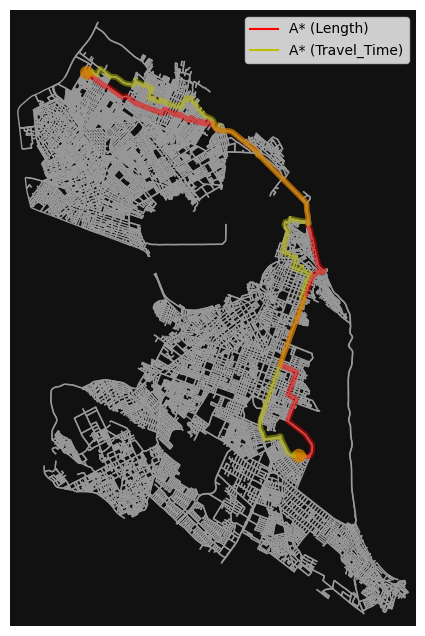

In [61]:
print("Plotting the A* path...")
fig1, ax1 = ox.plot_graph_routes(G, routes=[path_astar_length, path_astar_time],
                                 route_colors=['r','y'],
                                 route_linewidth=6,
                                 node_size=0,
                                 show=False,
                                 close=False)

# Cria linhas fictícias para legenda
astar_length_line = mlines.Line2D([], [], color='r', label='A* (Length)')
astar_time_line = mlines.Line2D([], [], color='y', label='A* (Travel_Time)')

# Adiciona a legenda ao gráfico
ax1.legend(handles=[astar_length_line, astar_time_line], loc='upper right')

# Exibe o gráfico com a legenda
plt.show()

Plotting the Dijkstra path...


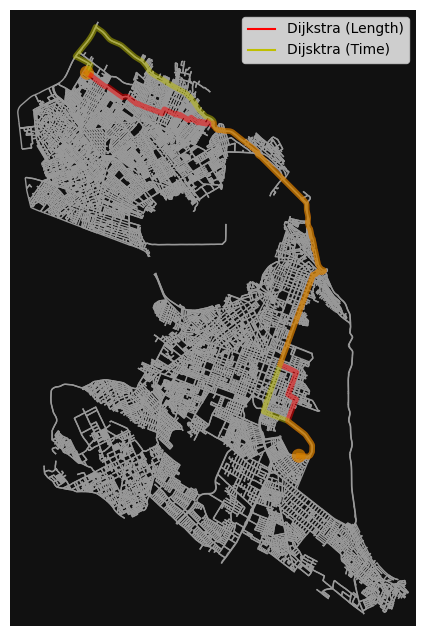

In [62]:
print("Plotting the Dijkstra path...")
fig2, ax2 = ox.plot_graph_routes(G, routes=[path_dijkstra_length, path_dijkstra_time],
                                 route_colors=['r','y'],
                                 route_linewidth=6,
                                 node_size=0,
                                 show=False,
                                 close=False)

# Cria linhas fictícias para legenda
dijkstra_length_line = mlines.Line2D([], [], color='r', label='Dijkstra (Length)')
dijkstra_time_line = mlines.Line2D([], [], color='y', label='Dijsktra (Time)')

# Adiciona a legenda ao gráfico
ax2.legend(handles=[dijkstra_length_line, dijkstra_time_line], loc='upper right')

# Exibe o gráfico com a legenda
plt.show()